# Introduction

The paper is about EEG-based emotion recognition using a feature fusion mechanism called Mutual-Cross-Attention (MCA). The goal is to improve the accuracy, efficiency, and interpretability of emotion classification systems, particularly for applications in psychological assessment. The authors integrate MCA with a custom 3D Convolutional Neural Network (3D-CNN) to combine time-domain and frequency-domain EEG features, specifically Differential Entropy (DE) and Power Spectral Density (PSD). Their method achieves state-of-the-art performance on the DEAP dataset, with accuracy rates of 99.49% for valence and 99.30% for arousal.

Table 1 in the paper summarizes the evaluation metrics of their proposed MCA-3D-CNN model. It reports accuracy, precision, recall, and F1-score for valence and arousal classification, showing that all metrics exceed 99%. This confirms the effectiveness of the model in accurately distinguishing emotional states based on EEG data.

# Setting up environment

In [1]:
!git clone https://github.com/MasseyGhalayani/MCA.git

Cloning into 'MCA'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 23 (delta 7), reused 16 (delta 5), pack-reused 0 (from 0)
Unpacking objects: 100% (23/23), 10.20 MiB | 7.27 MiB/s, done.


In [23]:
!git pull origin main

^C


In [2]:
cd MCA

/home/hpc/mrrr/mrrr120v/MCA


In [3]:
!nvidia-smi

Tue Feb 11 01:23:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti     On  |   00000000:02:00.0 Off |                  N/A |
| 42%   53C    P0             72W /  250W |       3MiB /  11264MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
conda env create -f environment.yml

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



libopenblas-0.3.21   | 5.4 MB    |                                       |   0% 
libgfortran-ng-11.2. | 20 KB     |                                       |   0% 

threadpoolctl-2.2.0  | 16 KB     |                                       |   0% 


pip-21.2.4           | 1.1 MB    |                                       |   0% 



openblas-0.3.4       | 13.7 MB   |                                       |   0% 




libgfortran5-11.2.0  | 2.0 MB    |                                       |   0% 





ca-certificates-2023 | 126 KB    |                                       |   0% 






libgomp-13.2.0       | 411 KB    |                      

In [ ]:
conda activate MCA-EEG

## downloading the dataset

In [3]:
pip install gdown

  Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
  Using cached beautifulsoup4-4.13.3-py3-none-any.whl (186 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
     |████████████████████████████████| 146 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 22.4 MB/s eta 0:00:01
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
rm ~/.cache/gdown/cookies.txt


In [2]:
import gdown

# a file
url = "https://drive.google.com/drive/folders/1JRiHw_lS9c50IkFKfkqzLlIf9gaatRcK?usp=sharing"
gdown.download_folder(url,use_cookies=False)

Retrieving folder contents


Processing file 1fwovOQm2fjGq6BgvEHyug3xxmnKl2-gx s01.npy
Processing file 1Rsav-LIYIKrQAri-fNVdZ4VgPaMmq3Kl s02.npy
Processing file 1R-0Ds8kxisX3uz5bjp_nH8V4bbXrNmEy s03.npy
Processing file 1o9qwRpVJCh3uLS2jrrx6mo-AgdzDzSXP s04.npy
Processing file 1sZ2gmGEJy8DnxyOmFpRCtiqoNPev5CrJ s05.npy
Processing file 1bFcLhgfwWEpew68JO4G-xwp7cz6wx4He s06.npy
Processing file 18Q09Kjj3wyOqk02BH6GLGuXDg1fsLcup s07.npy
Processing file 1LQwUQ3uer2r3HFOe1toynKOtzKZ3uZFD s08.npy
Processing file 1bMfBhilx6rd1-UJsqg54Rtx4Gbvipxq- s09.npy
Processing file 1RBA3WgeUCFVA7c0VsEj6z153lFnAeX1a s10.npy
Processing file 1PcNRR02Fo2IPCbQ_EWqhQ0sNKLC-M0Le s11.npy
Processing file 1ZxxiJzL-F9eryPjvUiBS2Kzgg_0qwEmv s12.npy
Processing file 10X890Xyzh8HpH1kR8hde6jAxhI175QMi s13.npy
Processing file 1kigyyPBbmcmn5XPVdU8CpGSFrPSpfUoX s14.npy
Processing file 1Dpx1CGu9jhgxIuTpJ-HXLs281ku49Jl7 s15.npy
Processing file 1YVKechc13cxdfDo2XraND6abNC2VFn2_ s16.npy
Processing file 1YJYspJjUgYpvOMV-z7j0qwDVIJOKIa08 s17.npy
Processing fil

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1fwovOQm2fjGq6BgvEHyug3xxmnKl2-gx
To: /home/hpc/mrrr/mrrr120v/features_new/s01.npy
100%|██████████| 23.9M/23.9M [00:00<00:00, 90.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Rsav-LIYIKrQAri-fNVdZ4VgPaMmq3Kl
To: /home/hpc/mrrr/mrrr120v/features_new/s02.npy
100%|██████████| 23.9M/23.9M [00:00<00:00, 93.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R-0Ds8kxisX3uz5bjp_nH8V4bbXrNmEy
To: /home/hpc/mrrr/mrrr120v/features_new/s03.npy
100%|██████████| 23.9M/23.9M [00:00<00:00, 28.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o9qwRpVJCh3uLS2jrrx6mo-AgdzDzSXP
To: /home/hpc/mrrr/mrrr120v/features_new/s04.npy
100%|██████████| 23.9M/23.9M [00:00<00:00, 46.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sZ2gmGEJy8DnxyOmFpRCtiqoNPev5CrJ
To: /home/hpc/mrrr/mrrr120v/features_new/s05.npy
100%|███

['/home/hpc/mrrr/mrrr120v/features_new/s01.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s02.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s03.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s04.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s05.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s06.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s07.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s08.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s09.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s10.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s11.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s12.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s13.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s14.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s15.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s16.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s17.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s18.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s19.npy',
 '/home/hpc/mrrr/mrrr120v/features_new/s20.npy',
 '/home/hpc/mrrr/mrr

In [3]:
mv features_new MCA

In [1]:
cd MCA

/home/hpc/mrrr/mrrr120v/MCA


# Setup the model and run the Tarining/Evaluation:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import time

import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import os


# Load processed DE PSD data and labels
data_de = []
data_psd = []
labels = []
num_channel = 32

for i in range(1, 33):
    feature = np.load("features_new/s{:02d}.npy".format(i), allow_pickle=True).item()
    psd = feature['psd_trial'] - feature['psd_baseline']
    de = feature['de_trial'] - feature['de_baseline']
    data_de.append(de)
    data_psd.append(psd)

    labels.append(feature['ratings'])

labels = np.concatenate(labels)
data_de = np.concatenate(data_de)
data_psd = np.concatenate(data_psd)

# The length of preprocessed data is only 58s, we need to pad it to 60s
def regulate_length(data):
    data = torch.reshape(data, (1280, num_channel, 5, 58, 4))
    data = torch.mean(data, dim=-1)
    zeros = torch.zeros((1280, num_channel, 5, 2), dtype=data.dtype, device=data.device)
    zeros[..., -2:] = data[..., -2:]
    data = torch.cat([data, zeros], dim=-1)
    print(data.shape)
    return data


padded_de = regulate_length(torch.from_numpy(data_de))
padded_psd = regulate_length(torch.from_numpy(data_psd))

print(padded_de.shape)
print(padded_psd.shape)


class MutualCrossAttention(nn.Module):
    def __init__(self, dropout):
        super(MutualCrossAttention, self).__init__()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x1, x2):
        # Assign x1 and x2 to query and key
        query = x1
        key = x2
        d = query.shape[-1]

        # Basic attention mechanism formula to get intermediate output A
        scores = torch.bmm(query, key.transpose(1, 2)) / math.sqrt(d)
        output_A = torch.bmm(self.dropout(F.softmax(scores, dim=-1)), x2)
        # Basic attention mechanism formula to get intermediate output B
        scores = torch.bmm(key, query.transpose(1, 2)) / math.sqrt(d)
        output_B = torch.bmm(self.dropout(F.softmax(scores, dim=-1)), x1)

        # Make the summation of the two intermediate outputs
        output = output_A + output_B  # shape (1280, 32, 60)

        return output

bands_counter = []
bands_num = 5
# Dropout 0.3 for avoiding overfitting
attention_merge = MutualCrossAttention(0.3)

# The MCA is implemented for each band separately
for i in range(bands_num):
    single_de = padded_de[:, :, i, :]
    single_psd = padded_psd[:, :, i, :]
    band = attention_merge(single_de, single_psd)
    bands_counter.append(band)

mca_processed = torch.stack(bands_counter, dim=2)

# For feature processed by MCA
selected_feature = np.array(mca_processed)

# For unprocessed Channel-Frequency-DE
# selected_feature = np.array(padded_de)

# For unprocessed Channel-PSD-Time
# selected_feature = np.array(padded_psd)

# For baseline element-wise summation of DE and PSD
# selected_feature = np.array(padded_de + padded_psd)

# normalize
x_min = selected_feature.min(axis=(1, 2), keepdims=True)
x_max = selected_feature.max(axis=(1, 2), keepdims=True)
mca_normal = (selected_feature-x_min)/(x_max-x_min)

print(mca_normal.shape)
print(type(mca_normal))

# The result output every 3s, adjust the depth to control the output frequency
# Don't encourage to modify it cause you also need to adjust the model input size
depth = 3

mca_normal = np.array(mca_normal)
mca_reshape = np.split(mca_normal, 60/depth, axis=3)
mca_reshape = np.reshape(mca_reshape, [-1, 32, 5, depth])
print(mca_reshape.shape)

####################Dividing Line#############################################
#																			 #
# 	The preliminary of data is almost done, now we process the labels		 #
# 	and set up the model for training										 #
#																			 #
####################Dividing Line#############################################


# Customized 3D CNN model to adapt to the input shape
class cnn_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv11 = nn.Conv3d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv3d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=2, padding=(0, 1, 1))

        self.conv21 = nn.Conv3d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv3d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=2, padding=0)

        self.fc_layer = nn.Linear(64*8*1*1, 2)
        self.dropout_layer = nn.Dropout(p=0.3)

    def forward(self, xb):
        h1 = self.conv11(xb)
        h1 = self.conv12(h1)
        h1 = self.pool1(h1)
        h1 = F.relu(h1)

        h2 = self.conv21(h1)
        h2 = self.conv22(h2)
        h2 = self.pool2(h2)
        h2 = F.relu(h2)

        # Before the fully connected layer, we need to flatten the output
        flatten = h2.view(-1, 64*8*1*1)
        out = self.fc_layer(flatten)
        return out

# Set up the training function
def train_model(model, x_train, y_train, x_test, y_test, epochs=12, batch_size=32, lr=0.0002, weight_decay=1e-4):
    # Load the data
    train_dataset = TensorDataset(x_train, y_train)
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size)

    # Initialization of the loss function
    loss_func = F.cross_entropy

    # Choose Adam as the optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Learning rate scheduler. Reduce the learning rate by a factor of 0.2 every 10 epochs
    scheduler = StepLR(optimizer, step_size=10, gamma=0.2)

    # Training and testing accuracy
    train_a = list([])
    test_a = list([])

    # Set up the training loop
    print('batch size: %d, learning rate: %f, weight_decay: %f' % (batch_size, lr, weight_decay))
    for epoch in range(epochs):
        model.train()
        tic = time.time()
        acc_train = []
        for xb, yb in train_data_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = loss_func(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            acc_train.append(pred.detach().argmax(1).eq(yb).float().mean().cpu().numpy())
        acc_train = np.mean(acc_train)
        scheduler.step()
        toc = time.time()

        with torch.no_grad():
            model.eval()
            y_pred = model(x_test.to(device))
            acc = y_pred.argmax(1).eq(y_test.to(device)).float().mean().cpu().numpy()

        train_a.append(acc_train)
        test_a.append(acc)
        print('Loss at epoch %d / %d : %f, train_acc: %f, test_acc: %f, running time: %d' % (epoch, epochs, loss.item(), acc_train, acc, toc-tic))

    # Plot the figure of accuracy variation
    plt.plot(train_a, 'y.-.')
    plt.plot(test_a, '.-.')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

# Init the model
model = cnn_classifier()

torch.Size([1280, 32, 5, 60])
torch.Size([1280, 32, 5, 60])
torch.Size([1280, 32, 5, 60])
torch.Size([1280, 32, 5, 60])
(1280, 32, 5, 60)
<class 'numpy.ndarray'>
(25600, 32, 5, 3)


## Training valence

In [11]:
# load label
cols = ['valence', 'arousal', 'dominance', 'liking']
label_df = pd.DataFrame(labels, columns=cols)
print(label_df.shape)
label_df[label_df < 5] = 0
label_df[label_df >= 5] = 1

# Choose the target dimension you want to validate
# The default is valence, which performs the best in our study
label_val = label_df['valence'].astype(int).values
label_val = np.tile(label_val, int(60/depth))
print(label_val.shape)

final_dataset = []
final_labels = []
final_dataset = mca_reshape
final_labels = label_val

# divive train & test
x_train, x_test, y_train, y_test = train_test_split(final_dataset, final_labels, test_size=0.1, random_state=1, stratify=final_labels)
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

# Final shape check of the processed data
torch.set_default_dtype(torch.double)
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)

print(x_train.shape)
print(x_test.shape)


(1280, 4)
(25600,)
torch.Size([23040, 1, 32, 5, 3])
torch.Size([2560, 1, 32, 5, 3])


Using 4 GPUs.
batch size: 32, learning rate: 0.000200, weight_decay: 0.000100
Loss at epoch 0 / 12 : 0.582962, train_acc: 0.622309, test_acc: 0.700391, running time: 24
Loss at epoch 1 / 12 : 0.322814, train_acc: 0.812500, test_acc: 0.889063, running time: 12
Loss at epoch 2 / 12 : 0.215008, train_acc: 0.942405, test_acc: 0.959766, running time: 12
Loss at epoch 3 / 12 : 0.125664, train_acc: 0.979340, test_acc: 0.973437, running time: 12
Loss at epoch 4 / 12 : 0.052960, train_acc: 0.990582, test_acc: 0.976172, running time: 12
Loss at epoch 5 / 12 : 0.042202, train_acc: 0.996050, test_acc: 0.983984, running time: 12
Loss at epoch 6 / 12 : 0.010520, train_acc: 0.998698, test_acc: 0.985156, running time: 12
Loss at epoch 7 / 12 : 0.011783, train_acc: 0.999392, test_acc: 0.986328, running time: 12
Loss at epoch 8 / 12 : 0.039498, train_acc: 0.991927, test_acc: 0.984375, running time: 12
Loss at epoch 9 / 12 : 0.014839, train_acc: 0.996181, test_acc: 0.984766, running time: 12
Loss at epoc

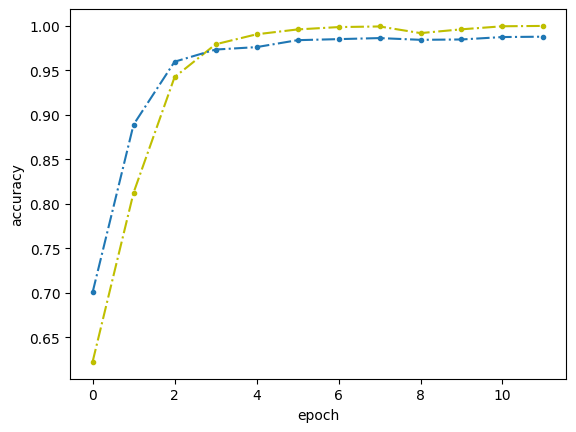

In [3]:
# Check if multiple GPUs are available
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs.")
    model = nn.DataParallel(model)

device = torch.device('cuda')
model = model.to(device)

# Start training
train_model(model, x_train.view(-1, 1, 32, 5, depth).double(), y_train, x_test.view(-1, 1, 32, 5, depth).double(), y_test)

## Testing valence

In [9]:
print(x_test.shape)
torch.save(x_test, "models/MCA_valence_x.pth")  # data
torch.save(y_test, "models/MCA_valence_y.pth")  # label

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Predict process
with torch.no_grad():
    outputs = model(x_test.view(-1, 1, 32, 5, depth).double().to(device))
    predicted = outputs.argmax(1)

# Convert to numpy array
predicted = predicted.cpu().numpy()
y_test = y_test

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, predicted)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['True: Low Valence', 'True: High Valence'],
                              columns=['Predict: Low Valence', 'Predict: High Valence'])

print(f"Model Accuracy: {accuracy}")
print(conf_matrix_df)

# Save model
torch.save(model.state_dict(), "models/MCA_valence.pth")

torch.Size([2560, 1, 32, 5, 3])
Model Accuracy: 0.987890625
                    Predict: Low Valence  Predict: High Valence
True: Low Valence                   1035                     17
True: High Valence                    14                   1494


## Training arousal

In [12]:
# load label
cols = ['valence', 'arousal', 'dominance', 'liking']
label_df = pd.DataFrame(labels, columns=cols)
print(label_df.shape)
label_df[label_df < 5] = 0
label_df[label_df >= 5] = 1

# Choose the target dimension you want to validate
# The default is valence, which performs the best in our study
label_val = label_df['arousal'].astype(int).values
label_val = np.tile(label_val, int(60/depth))
print(label_val.shape)

final_dataset = []
final_labels = []
final_dataset = mca_reshape
final_labels = label_val

# divive train & test
x_train, x_test, y_train, y_test = train_test_split(final_dataset, final_labels, test_size=0.1, random_state=1, stratify=final_labels)
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

# Final shape check of the processed data
torch.set_default_dtype(torch.double)
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)

print(x_train.shape)
print(x_test.shape)


(1280, 4)
(25600,)
torch.Size([23040, 1, 32, 5, 3])
torch.Size([2560, 1, 32, 5, 3])


Using 4 GPUs.
batch size: 32, learning rate: 0.000200, weight_decay: 0.000100
Loss at epoch 0 / 12 : 0.445756, train_acc: 0.596007, test_acc: 0.729688, running time: 14
Loss at epoch 1 / 12 : 0.094357, train_acc: 0.823698, test_acc: 0.917188, running time: 12
Loss at epoch 2 / 12 : 0.020713, train_acc: 0.950304, test_acc: 0.969922, running time: 12
Loss at epoch 3 / 12 : 0.012968, train_acc: 0.982335, test_acc: 0.978125, running time: 12
Loss at epoch 4 / 12 : 0.006893, train_acc: 0.992882, test_acc: 0.985156, running time: 12
Loss at epoch 5 / 12 : 0.002971, train_acc: 0.996875, test_acc: 0.985547, running time: 12
Loss at epoch 6 / 12 : 0.019066, train_acc: 0.998438, test_acc: 0.985156, running time: 12
Loss at epoch 7 / 12 : 0.000867, train_acc: 0.997873, test_acc: 0.979688, running time: 12
Loss at epoch 8 / 12 : 0.007041, train_acc: 0.996137, test_acc: 0.986328, running time: 12
Loss at epoch 9 / 12 : 0.004545, train_acc: 0.999783, test_acc: 0.984375, running time: 12
Loss at epoc

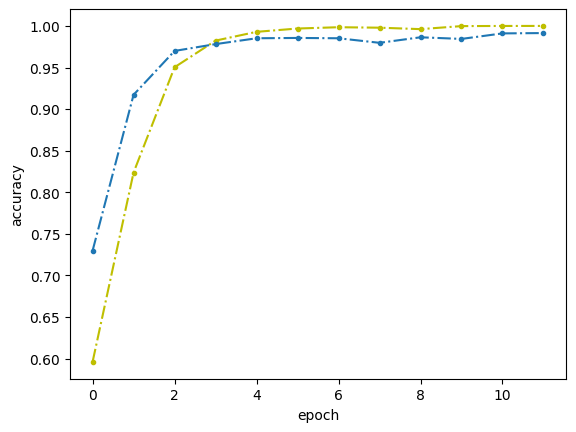

In [13]:
# Check if multiple GPUs are available
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs.")
    model = nn.DataParallel(model)

device = torch.device('cuda')
model = model.to(device)

# Start training
train_model(model, x_train.view(-1, 1, 32, 5, depth).double(), y_train, x_test.view(-1, 1, 32, 5, depth).double(), y_test)

In [15]:
print(x_test.shape)
torch.save(x_test, "models/MCA_arousal_x.pth")  # data
torch.save(y_test, "models/MCA_arousal_y.pth")  # label

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Predict process
with torch.no_grad():
    outputs = model(x_test.view(-1, 1, 32, 5, depth).double().to(device))
    predicted = outputs.argmax(1)

# Convert to numpy array
predicted = predicted.cpu().numpy()
y_test = y_test

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, predicted)
conf_matrix = confusion_matrix(y_test, predicted)
print(accuracy)
print(conf_matrix)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['True: Low arousal', 'True: High arousal'],
                              columns=['Predict: Low arousal', 'Predict: High arousal'])


print(f"Model Accuracy: {accuracy}")
print(conf_matrix_df)

# Save model
torch.save(model.state_dict(), "models/MCA_arousal.pth")

torch.Size([2560, 1, 32, 5, 3])
0.99140625
[[1106    6]
 [  16 1432]]
Model Accuracy: 0.99140625
                    Predict: Low arousal  Predict: High arousal
True: Low arousal                   1106                      6
True: High arousal                    16                   1432


## Making the final reproduce table and make a comparison

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    accuracy = (TP + TN) / np.sum(conf_matrix) * 100
    precision = TP / (TP + FP) * 100
    recall = TP / (TP + FN) * 100
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1


conf_matrix_arousal = np.array([[1106, 6], [16, 1432]])
conf_matrix_valence = np.array([[1035, 17], [14, 1494]])

accuracy_arousal, precision_arousal, recall_arousal, f1_arousal = calculate_metrics(conf_matrix_arousal)
accuracy_valence, precision_valence, recall_valence, f1_valence = calculate_metrics(conf_matrix_valence)

data = {
    "Category": ["Valence", "Arousal"],
    "Accuracy(%)": [accuracy_valence, accuracy_arousal],
    "Precision(%)": [precision_valence, precision_arousal],
    "Recall(%)": [recall_valence, recall_arousal],
    "F1-Score(%)": [f1_valence, f1_arousal],
}

metrics_df = pd.DataFrame(data)
metrics_df


,Category,Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,Valence,98.789062,98.874917,99.071618,98.973170
1,Arousal,99.140625,99.582754,98.895028,99.237699


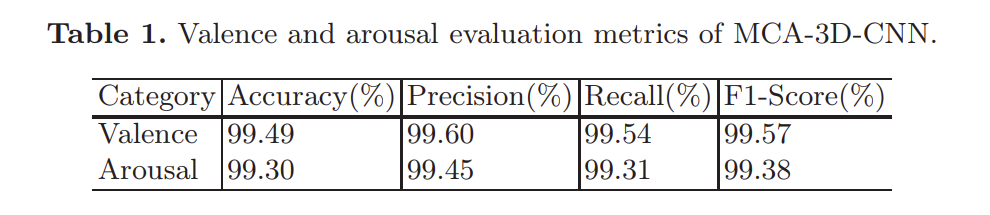

In [25]:
import IPython.display as display
display.display(display.Image(filename="assets/table1.png",width=800, height=600))

## Conclusion
From the results, we can see that the reproduced metrics are very close to those reported in the paper, but there are slight differences. The accuracy, precision, recall, and F1-score values for arousal align well with the original table, while the valence results are slightly lower. These minor variations could be due to diffrent hardware and not having a random seed.